In [3]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

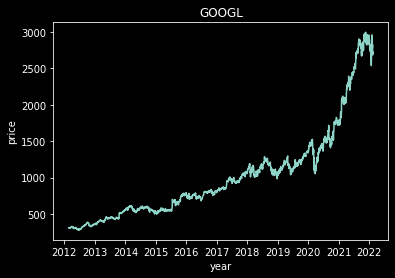

In [92]:
%matplotlib inline
style.use('dark_background')
plt.plot(df['Adj Close'])
plt.title(ticker_name)
plt.xlabel("year")
plt.ylabel("price")
plt.show()

In [29]:
def stock_returns(ticker, years=10):
    """Return a time series of a stock's returns over a span of default 10 years"""
    
    today = dt.datetime.now()

    # 10 years ago
    start = today - dt.timedelta(days=years*365)
    
    df = pdr.get_data_yahoo(ticker, start, today)

    # drop rows with missing values
    df.dropna(axis='index', how='all', inplace=True)

    # Pull returns into a time series
    # return df['Adj Close'].shift(-1) / df['Adj Close']
    return df['Adj Close'].pct_change(1).dropna()

In [42]:
def sharpe_ratio(Re_series):
    """calculate the sharpe ratio given a daily return series"""
    sharpe_ratio = (255**0.5) * Re_series.mean() / Re_series.std()
    return sharpe_ratio